In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [3]:
np.set_printoptions(precision=3, suppress=True)

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [5]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [14]:
dataset = raw_dataset.copy()

## Cleaning

In [15]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [16]:
dataset = dataset.dropna()

Turn Origin categorical

In [18]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [19]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


## Split

In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [24]:
train_dataset.shape, test_dataset.shape

((314, 10), (78, 10))

## Analysis

Train and Test shopuld have the same distributions

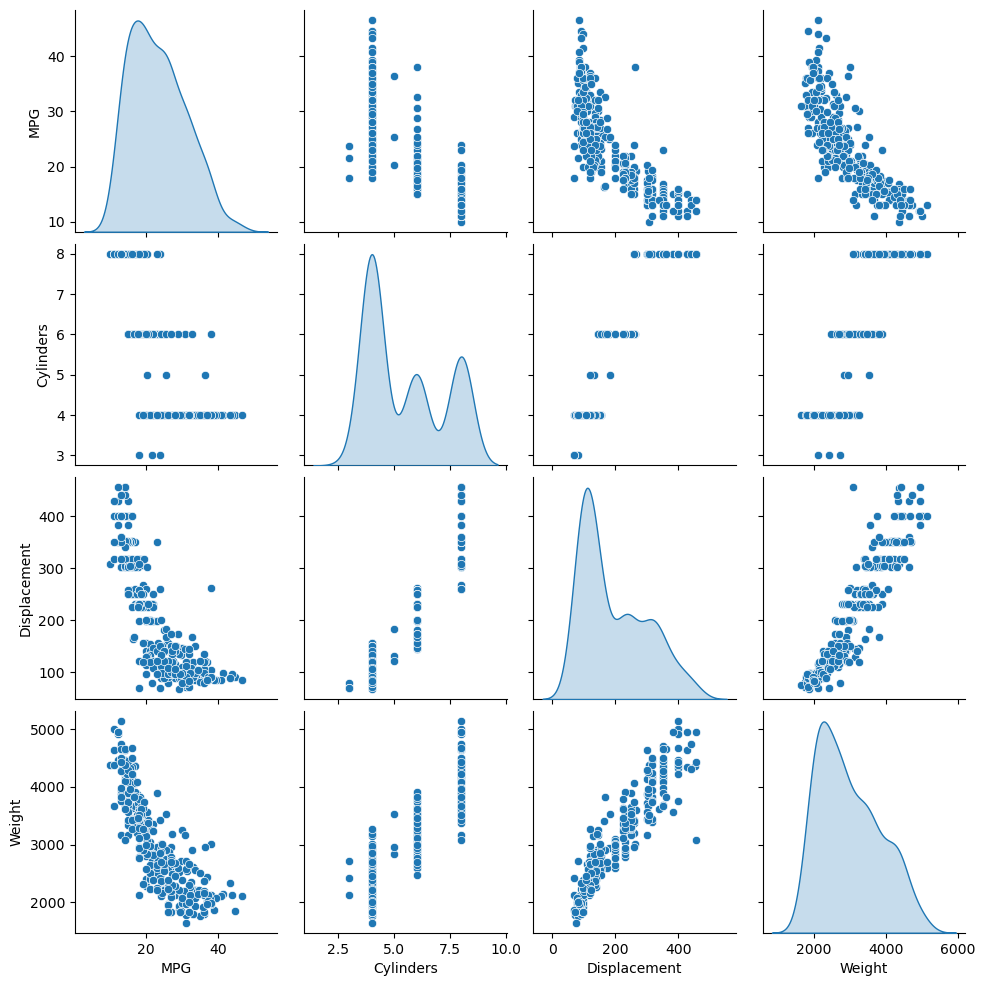

In [21]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

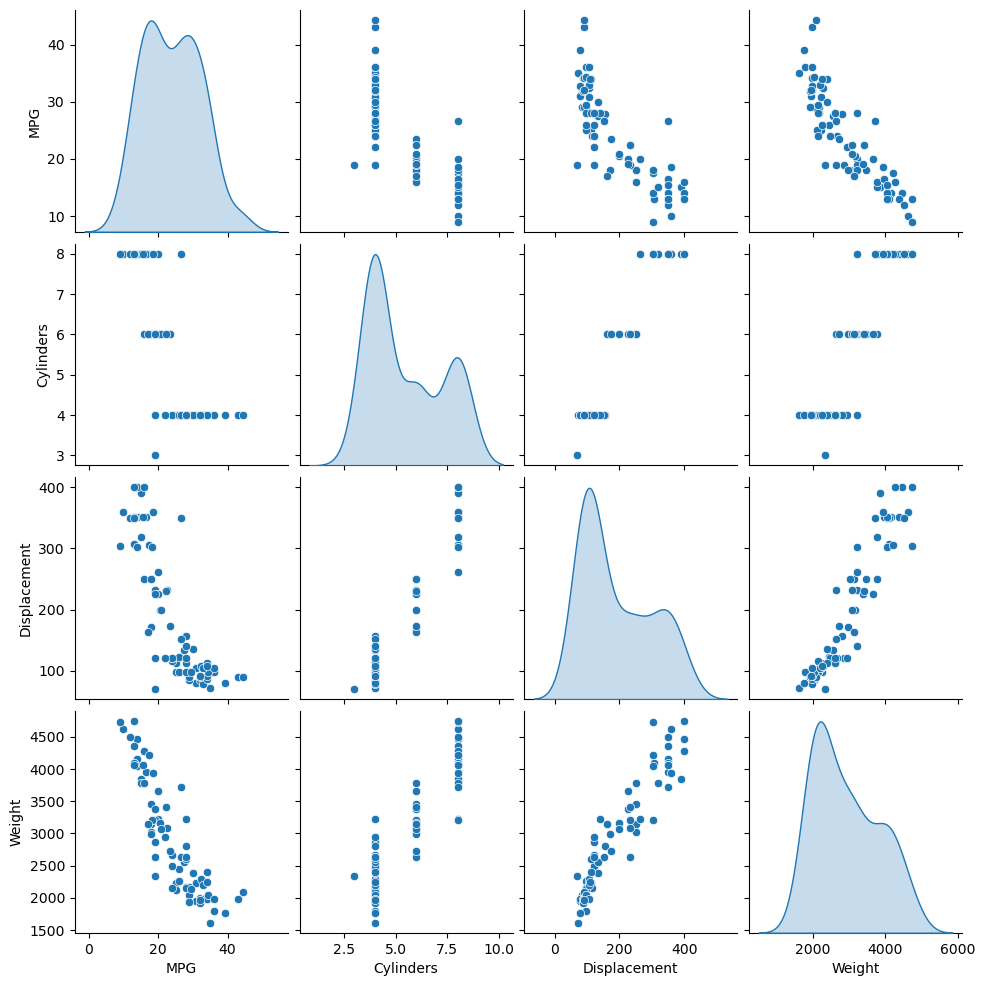

In [22]:
sns.pairplot(test_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

Correlation between features

In [34]:
train_dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\joao\AppData\Local\Temp\ipykernel_7812\4230317367.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  train_dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.00,-0.77,-0.80,-0.76,-0.82,0.40,0.57,0.24,0.46,-0.56
Cylinders,-0.77,1.00,0.95,0.84,0.89,-0.51,-0.34,-0.36,-0.39,0.61
Displacement,-0.80,0.95,1.00,0.90,0.93,-0.55,-0.36,-0.39,-0.43,0.66
Horsepower,-0.76,0.84,0.90,1.00,0.86,-0.70,-0.39,-0.30,-0.31,0.49
Weight,-0.82,0.89,0.93,0.86,1.00,-0.41,-0.28,-0.31,-0.43,0.60
Acceleration,0.40,-0.51,-0.55,-0.70,-0.41,1.00,0.28,0.23,0.10,-0.27
Model Year,0.57,-0.34,-0.36,-0.39,-0.28,0.28,1.00,-0.08,0.23,-0.13
Europe,0.24,-0.36,-0.39,-0.30,-0.31,0.23,-0.08,1.00,-0.23,-0.60
Japan,0.46,-0.39,-0.43,-0.31,-0.43,0.10,0.23,-0.23,1.00,-0.64
USA,-0.56,0.61,0.66,0.49,0.60,-0.27,-0.13,-0.60,-0.64,1.00


General statistics

In [26]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


## Split Labels from Data

In [27]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [31]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [32]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

## Normalization

Features are using **different** scales (see *mean* and *std* in *.describe()*), this will turn the training **unstable**

***Note**: There is no advantage to normalizing the one-hot features—it is done for simplicity* - Tensorflow

In [29]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [30]:
normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.178,    0.197,    0.624]], dtype=float32)

first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

## Model - Linear

Build a simple 1 layer linear model (Dense with *linear* activation)

In [37]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [40]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


Test model in 3 instances

In [42]:
linear_model.predict(train_features[:3])

1/1 [==============================] - 0s 9ms/step


array([[-1.111],
       [-0.482],
       [ 0.81 ]], dtype=float32)

Inspect untrained layer

In [44]:
linear_model.layers[1].variables

[<tf.Variable 'dense/kernel:0' shape=(9, 1) dtype=float32, numpy=
 array([[ 0.685],
        [ 0.464],
        [ 0.113],
        [-0.303],
        [-0.181],
        [ 0.605],
        [-0.201],
        [ 0.278],
        [ 0.026]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

Model training

In [45]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [46]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0, # Suppress logging
    validation_split = 0.2 # Calculate validation results on 20% of the training data
)

CPU times: total: 3.72 s
Wall time: 3.98 s


In [51]:
pd.DataFrame(history.history)

,loss,val_loss
0,22.869833,23.162483
1,22.016352,22.438976
2,21.216925,21.733883
3,20.368511,21.003265
4,19.541424,20.279753
...,...,...
95,2.485501,2.471367
96,2.472944,2.457477
97,2.498579,2.446141
98,2.490891,2.463002


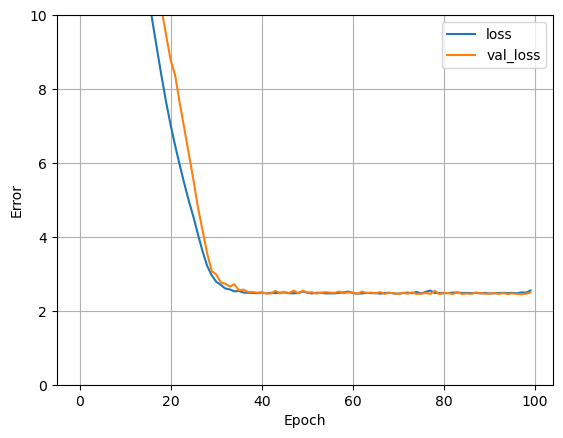

In [53]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [62]:
test_results = {}

In [63]:
test_results['linear'] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [64]:
test_results['linear']

2.477825880050659

## Model - DNN

Build a deeper model using non-lionearity (*relu* activations)

In [56]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [57]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [58]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: total: 3.95 s
Wall time: 3.84 s


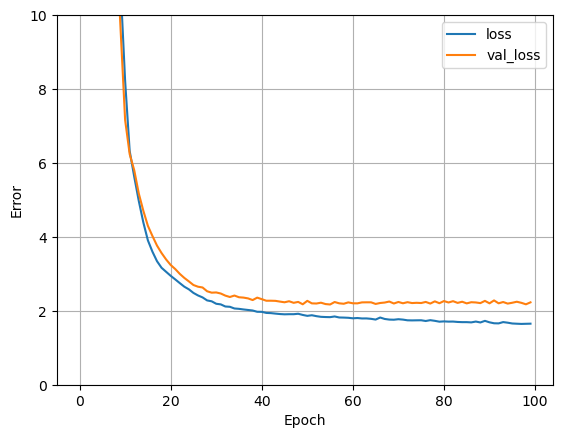

In [59]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [65]:
test_results['dnn'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [66]:
test_results['dnn']

1.7195172309875488

## Model Evaluation

In [67]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
linear,2.477826
dnn,1.719517


Visualize the prediction error of the DNN model

3/3 [==============================] - 0s 0s/step


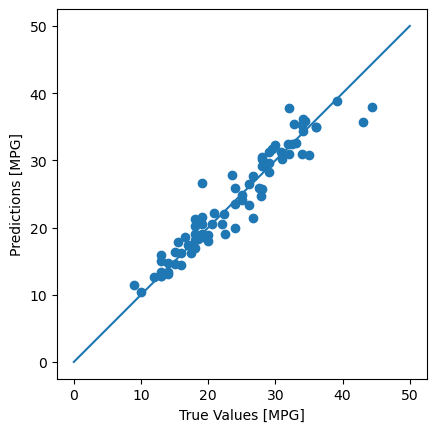

In [75]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal') # aspect ratio of image
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.plot([0, 50], [0, 50]) # clip on 50

Visualize the error distribution of the DNN model

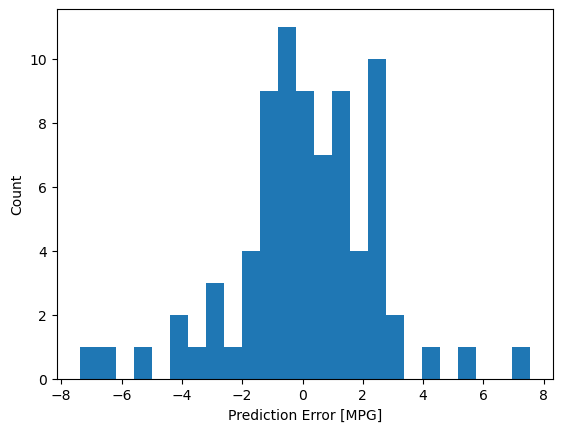

In [70]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')